In [23]:
# -------- BIBLIOTEKI -------- 

from IPython.display import Markdown as md
import mercury as mr

import numpy as np
import pandas as pd
import xgboost as xgb

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn import linear_model 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import mean_squared_error, r2_score


#Zmienienie formatu zapisu danych numerycznych na dwie cyfry po przecinku.
pd.options.display.float_format = '{:.2f}'.format

#Wczytanie danych
df = pd.read_csv('insurance.csv')

In [2]:
app = mr.App(title="Prezentacja Projekt ML", description="Interaktywna aplikacja do prognozy progu ubezpieczenia") 

mercury.App

<h1 style="text-align:center; 
          color:#263a57; 
          font-family:verdana;"> Jak kosztowne jest zdrowie? </h1>

<p style="text-align:center;
          color:#263a57;
          font-family:verdana;
          font-size:1.1em"> Przewidywanie progu ubezpieczenia <br> zdrowotnego. </p>

<p style="padding-top:50px; 
          padding-left:100px;
          font-family:verdana;
          text-align:left; 
          margin-bottom:0;"> Prezentują:</p>
          
<p style="padding-top:10px; 
          padding-left:125px;
          font-family:verdana;
          font-size:0.9em;
          text-align:left; 
          margin-top: 0;">Szymon Cyranowicz<br>Gabriela Piwar<br>Łukasz Sielicki </p>

<p style="text-align:right;
          font-family:verdana;
          font-size:0.9em;
          margin-top: 0;"> 15.10.2023 </p>

<h2 style="color:#263a57; 
           font-family:verdana;
           padding-bottom:50px;"> Cel Projektu </h2>
          
<p style = "font-family:verdana;
            font-size:1.2em;"> 
            Określenie kosztów ubezpieczenia zdrowotnego na podstawie wybranych parametrów osobowych. </p> 
            
<p style = "padding-bottom:50px; 
            font-family:verdana;
            font-size:1.2em;">Stworzenie aplikacji do pomocy w wyznaczeniu progu ubezpieczenia.</p>



<h2 style="color:#263a57; 
          font-family:verdana;"> Zbiór Danych </h2>

<p> Źródło: 
<a href="https://www.kaggle.com/datasets/mirichoi0218/insurance">Medical Cost Personal Datasets</a>
</p>

 
|    |   age | sex    |    bmi |   children | smoker   | region    |   charges |
|---:|------:|:-------|-------:|-----------:|:---------|:----------|----------:|
|  0 |    19 | female | 27.9   |          0 | yes      | southwest |  16884.9  |
|  1 |    18 | male   | 33.77  |          1 | no       | southeast |   1725.55 |
|  2 |    28 | male   | 33     |          3 | no       | southeast |   4449.46 |
|  3 |    33 | male   | 22.705 |          0 | no       | northwest |  21984.5  |
|  4 |    32 | male   | 28.88  |          0 | no       | northwest |   3866.86 |


<h2 style="color:#263a57; 
           font-family:verdana;
           padding-bottom:50px;"> Pojęcia i definicje </h2>

<p style = "font-family:verdana;
            font-size:1.2em;"> 
            Jak działa ubezpieczenie w ameryce? Od czego zależy?  </p> 

<h2 style="color:#263a57; 
          font-family:verdana;"> Analiza danych </h2>
          
<p> Rozkład zmiennych </p>

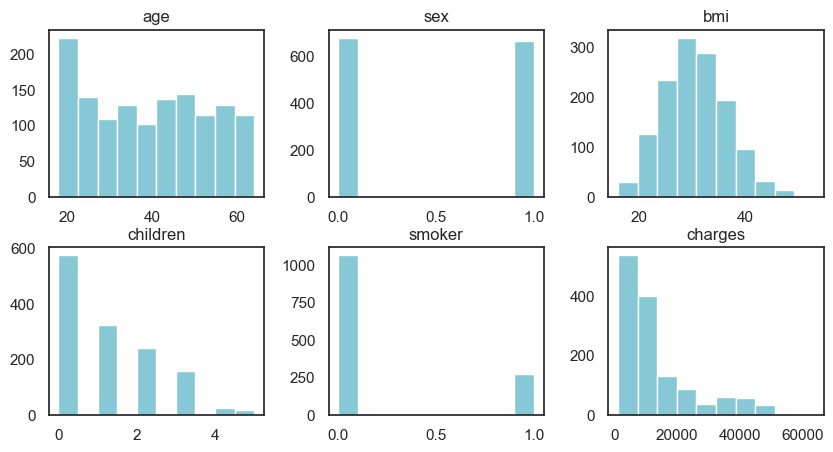

<h2 style="color:#263a57; 
          font-family:verdana;"> Analiza danych </h2>
          
<p> Macierz Korelacji </p>

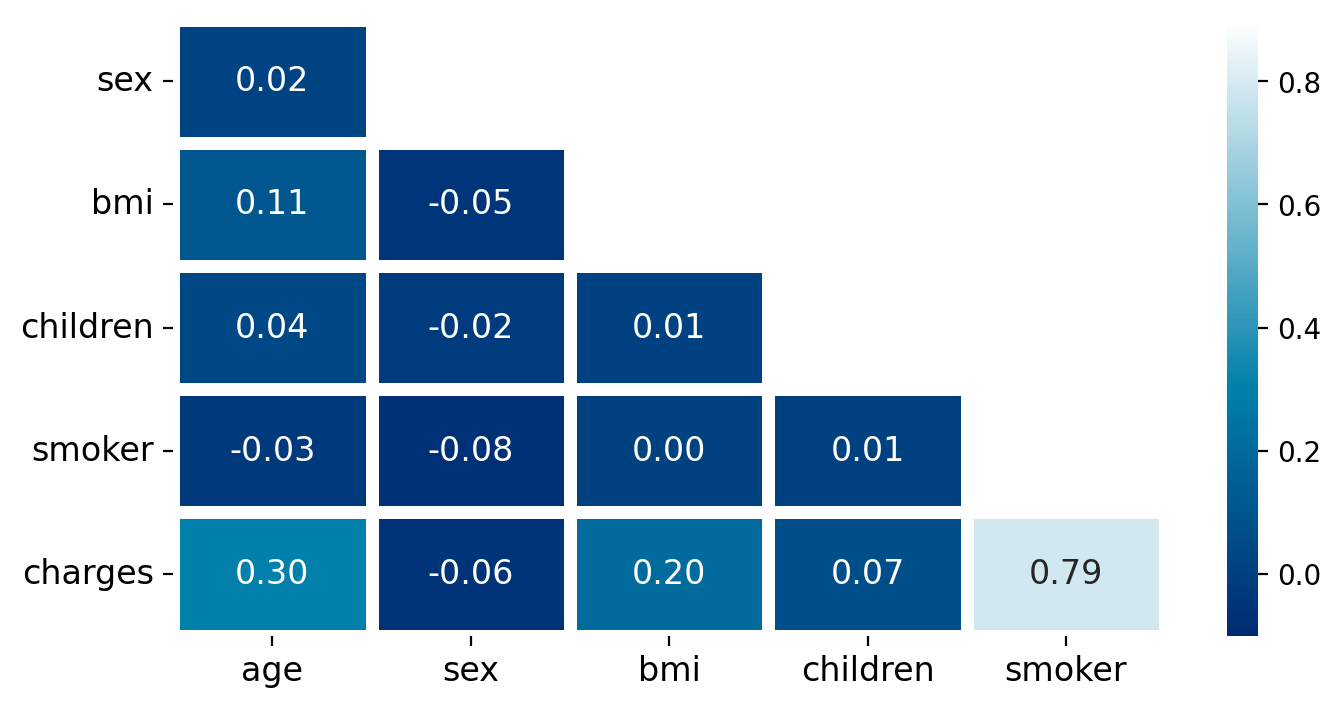

<h2 style="color:#263a57; 
          font-family:verdana;"> Analiza danych </h2>
          
<p> Zależność progu ubezpieczenia od BMI. </p>  

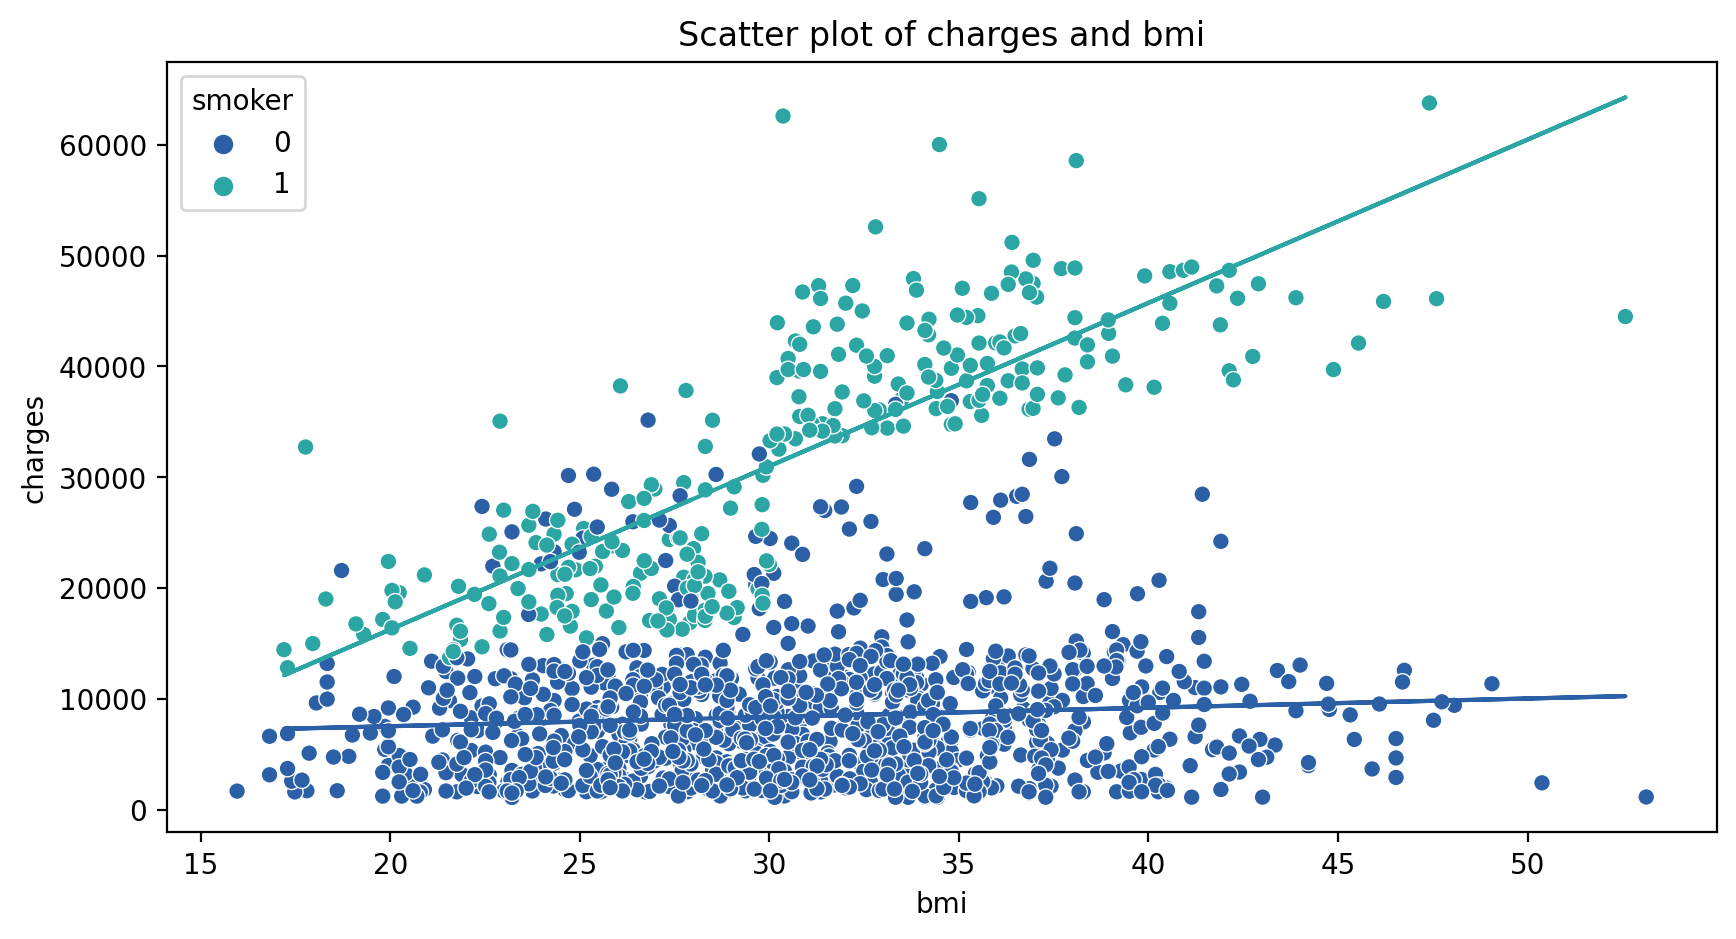

<h2 style="color:#263a57; 
          font-family:verdana;"> Analiza danych </h2>
          
<p> Zależność progu ubezbieczenia od wieku. </p> 

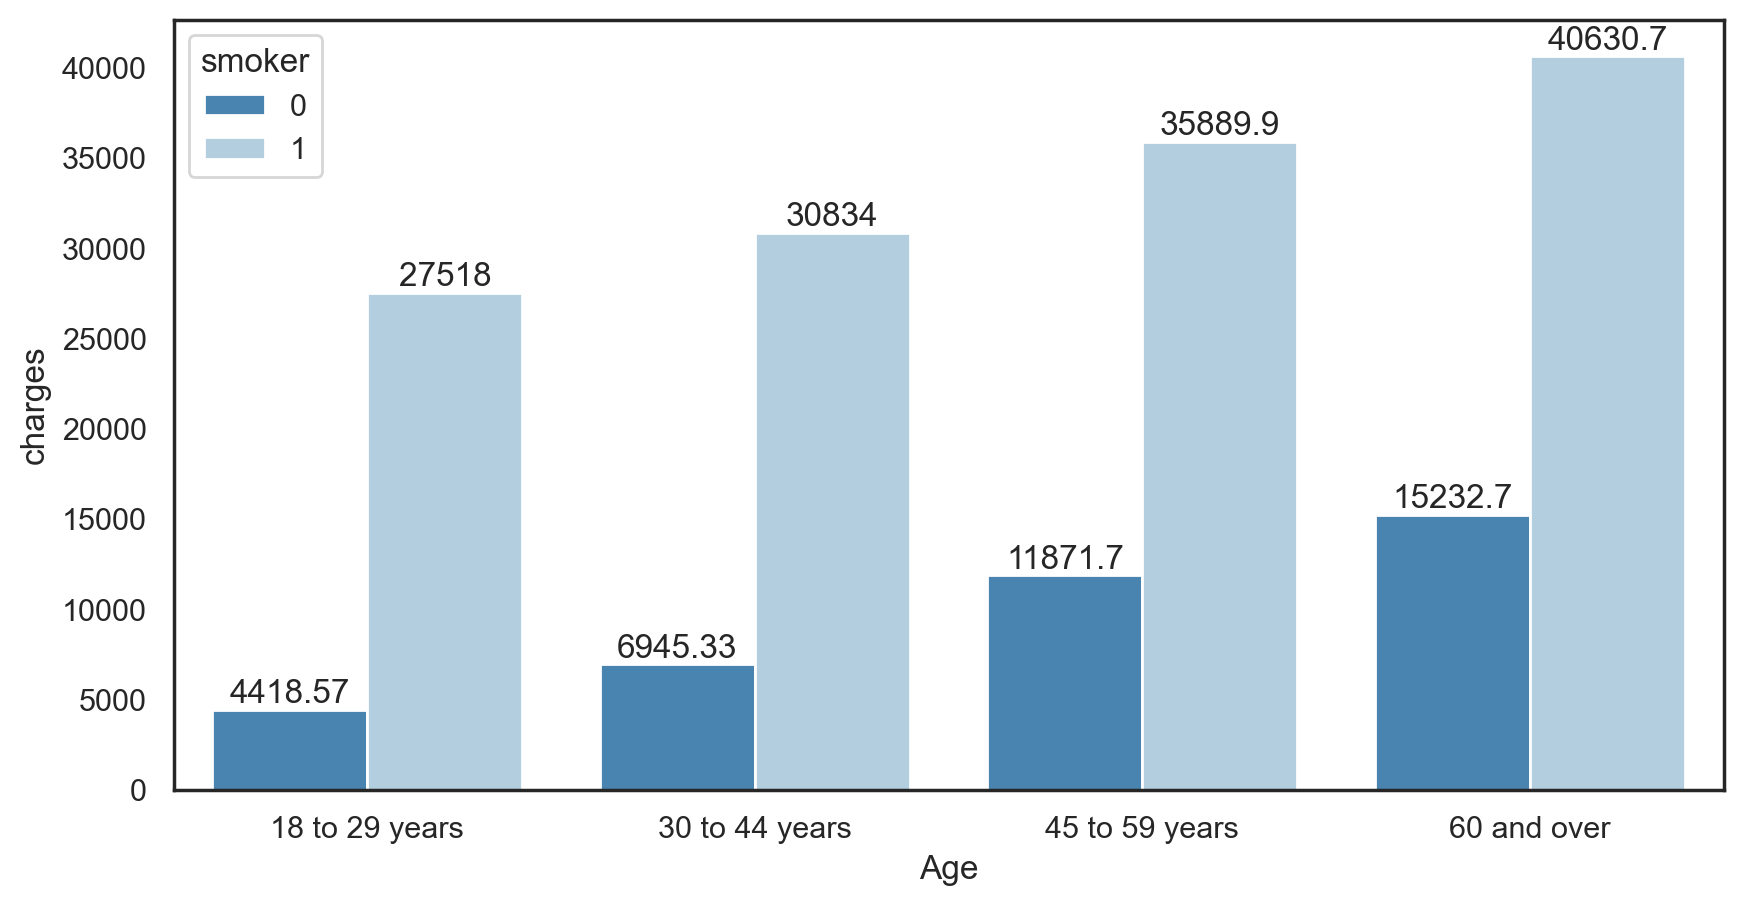

<h2 style="color:#263a57; 
          font-family:verdana;"> Regresja </h2>
          
<p style = "font-family:verdana;
            font-size:1.2em;"> 
            Model 1 - regresja liniowa </p> 
            
<p style = "font-family:verdana;
            font-size:1.2em;"> Model 2 - regresja polinominalna </p>   
            
<p style = "padding-bottom:50px; 
            font-family:verdana;
            font-size:1.2em;"> Model 3 - lasy losowe</p> 

<h2 style="color:#263a57; 
          font-family:verdana;"> Regresja </h2>
          
<p> Porównanie zastosowanych modeli: </p>


|                            | Parameters                                                                     |   Training Accuracy |   Testing Accuracy |   Training RMSE |   Testing RMSE |   5-Fold Score |
|:---------------------------|:-------------------------------------------------------------------------------|--------------------:|-------------------:|----------------:|---------------:|---------------:|
| Multiple Linear Regression | fit_intercept=False                                                            |            0.737336 |           0.799473 |         6169.68 |        5537.11 |       0.747835 |
| Polynomial Regression      | fit_intercept=False                                                            |            0.833028 |           0.895434 |         4919.08 |        3998.46 |       0.835794 |
| Decision Tree Regression   | max_depth=7                                                                    |            0.886818 |           0.863494 |         4049.97 |        4568.5  |       0.822452 |
| Random Forest Regression   | n_estimators=100, max_depth=7                                                  |            0.925169 |           0.897358 |         3293.09 |        3961.5  |       0.852046 |
| Xgboost Regression         | learning_rate = 0.5, gamma = 0.1, n_estimators=30, max_depth=10, max_leaves=15 |            0.931919 |           0.888693 |         3141.06 |        4125.32 |       0.83826  |

In [51]:
# add numeric widget AGE
age_input = mr.Slider(value=25, min = 18, max=70, label="Wiek", step=1)

mercury.Slider

In [34]:
# add numeric widget BMI
bmi_input = mr.Slider(value=20, min = 10, max=50, label="BMI", step=1)

mercury.Slider

In [35]:
# add numeric widget BMI
children_input = mr.Slider(value=0, min = 0, max=5, label="Dzieci", step=1)

mercury.Slider

In [36]:
# add checkbox
smoker_input = mr.Select(value="no", choices=['no', 'yes'], label="Pali")

mercury.Select

In [37]:
# add select widget
sex_input = mr.Select(value="male", choices=['male', 'female'], label="Płeć")

mercury.Select

In [38]:
region_input = mr.Select(value="southeast", choices=['southeast', 'southwest', 'northeast', 'northwest'], label="Region")

mercury.Select

In [17]:
features_df= df.drop('charges', axis=1)
insurance_df = pd.read_csv('insurance.csv')

numerical_features = ['age', 'bmi', 'children']
categorical_features = ['sex','smoker', 'region']

numeric_pipeline = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('one-hot', OneHotEncoder(handle_unknown='ignore'))
])

full_processor_insurance = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, numerical_features),
    ('category', categorical_pipeline, categorical_features)
])

full_processor_insurance.fit(features_df)
full_processor_insurance.transform(features_df)
insurance_set_mod = pd.DataFrame(full_processor_insurance.transform(features_df), columns=full_processor_insurance.get_feature_names_out())

In [18]:
# Podział danych
X_train, X_test, y_train, y_test = train_test_split(features_df, insurance_df['charges'], test_size=0.2, random_state=123)

In [19]:
dtr_reg = Pipeline(steps=[
    ('preprocess', full_processor_insurance),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', DecisionTreeRegressor(max_depth=6, random_state=123))
])

dtr_reg.fit(X_train, y_train)

y_pred_train = dtr_reg.predict(X_train)
y_pred_test = dtr_reg.predict(X_test)

<h2 style="color:#263a57; 
           font-family:verdana;
           padding-bottom:25px;"> Aplikacja </h2>

In [50]:
display(md("#### Wprowadzone dane pacjenta"))
inputs = {'age': [age_input.value],
          'sex': [sex_input.value],
          'bmi': [bmi_input.value],
          'children': [children_input.value],
          'smoker': [smoker_input.value],
          'region': [region_input.value]}

inputs_df = pd.DataFrame(inputs)
display(inputs_df)

display(md("#### Przewidywane koszty"))
y_pred_inputs = dtr_reg.predict(inputs_df)
print(y_pred_inputs[0])

#### Wprowadzone dane pacjenta

,age,sex,bmi,children,smoker,region
0,25,male,20,0,no,southeast


#### Przewidywane koszty

3271.3503702030443


<h2 style="color:#263a57; 
           font-family:verdana;
           padding-bottom:50px;"> Wnioski </h2>
          
<p style = "font-family:verdana;
            font-size:1.2em;"> 
            Wniosek numer 1. </p> 
            
<p style = "padding-bottom:50px; 
            font-family:verdana;
            font-size:1.2em;"> Wniosek numer 2</p>

<h1 style="text-align:center; 
          color:#263a57; 
          font-family:verdana;"> Dziękujemy za uwagę! </h1>